In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC


In [ ]:
# Model have being trained on Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Profiling  
No of rows  
No of Columns  
Others  


In [ ]:
train_data = pd.read_csv("drive/My Drive/PyColab Work/Santender/train.csv", index_col = "ID_code")
og_test = pd.read_csv("drive/My Drive/PyColab Work/Santender/test.csv", index_col = "ID_code")
#train_data = train_data.iloc[:,0:150] # 150  is 75 % of 200
train_data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
train_data["target"] = pd.Categorical(train_data["target"])

In [ ]:
X = train_data.drop(["target"], axis = 1)
y = train_data["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75, test_size = .25, stratify = y)

In [ ]:
y_test.value_counts()

0    44976
1     5024
Name: target, dtype: int64

In [ ]:
y_train.value_counts()/len(y_train)

0    0.899507
1    0.100493
Name: target, dtype: float64

## RandomForest

In [ ]:
ranger = RandomForestClassifier(n_estimators = 100, class_weight={0:9, 1:1}, max_depth=None)
ranger.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 9, 1: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [ ]:
confusion_matrix(y_test, ranger.predict(X_test))

array([[44933,    43],
       [ 4931,    93]])

In [ ]:
roc_auc_score(y_test, ranger.predict_proba(X_test)[:,1])

0.7962755649439077

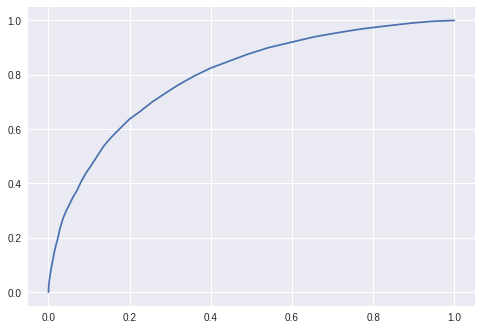

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,  ranger.predict_proba(X_test)[:,1]) #[:,1] or [:,0] #Use decision function?
plt.plot ( fpr , tpr ) 
plt . show ()

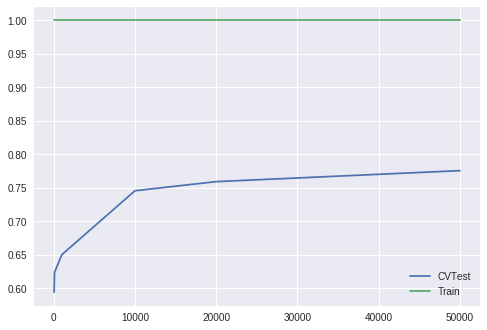

In [ ]:
lc_size, lc_train, lc_test = learning_curve(ranger, X_train, y_train, cv = 5, train_sizes=[50, 100, 1000, 10000, 20000, 50000], scoring = "roc_auc", shuffle = True)
pd.DataFrame({"Train": np.mean(lc_train, axis = 1), "CVTest": np.mean(lc_test, axis = 1) }, index = lc_size).plot()